# Classification of Sugarcane Leaf Images using PCA and SVM

Project Description
This project focuses on building a machine learning model to classify sugarcane leaf images into four specific health categories: Healthy, Yellow, Rust, and Red Rot. The classification is performed using a combination of Principal Component Analysis (PCA) for dimensionality reduction and Support Vector Machine (SVM) for high-accuracy classification.

The dataset consists of sugarcane leaf images captured in varying conditions. Each image undergoes preprocessing, including resizing, grayscale conversion, feature extraction, and normalization. PCA is applied to reduce the high-dimensional image space while preserving more than 98% of the total variance, ensuring optimal performance with minimized computational cost.

The reduced feature space is then used to train an SVM classifier with a linear kernel, which is suitable for high-dimensional and linearly separable data. Performance metrics include accuracy, precision, recall, F1-score, and a confusion matrix to visualize classification performance across the four categories.



In [ ]:
# Import library
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

In [ ]:
# Folder Image
input_folder = "Data Source/daun_tebu_resized_Hdata"

# List of categories of sugarcane leaves to be classified
categories = ["healthy", "redrot", "yellow", "rust"]

# X = holds image features
# Y = holds the category of each image
X = []
Y = []

# Fetch all image files in a folder and sort them
file_list = sorted(glob(input_folder + "/*"))

shown = {}

# The sugarcane leaf image data is changed to gray.

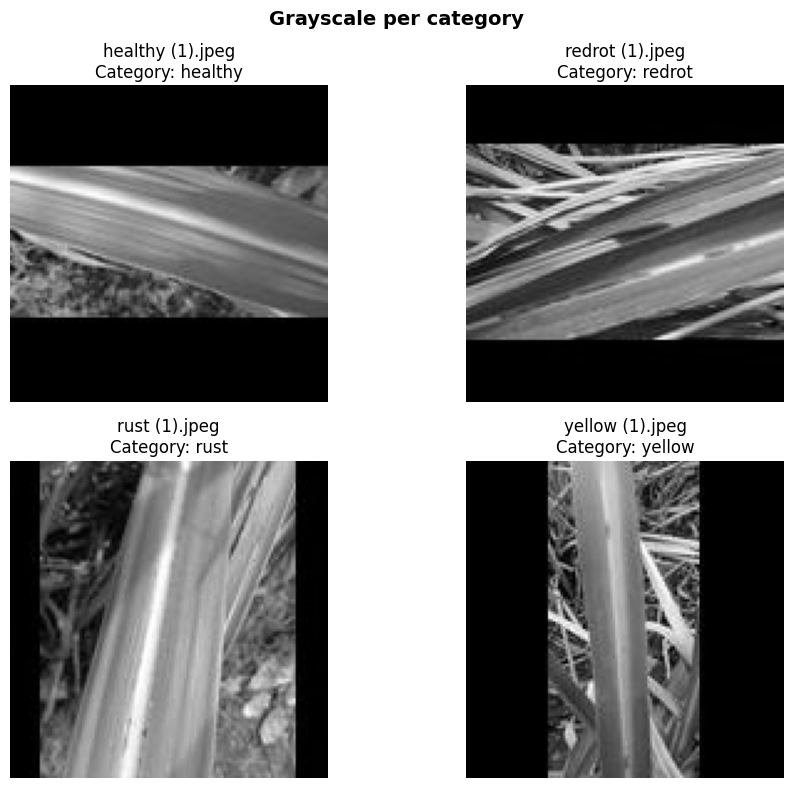

Total data: 800
Feature dimensions: 16384


In [ ]:
# Display grayscale images per category
plt.figure(figsize=(10, 8))
plt.suptitle("Grayscale per category", fontsize=14, fontweight="bold")
subplot_index = 1

for file in file_list:
    img = cv2.imread(file)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gray.astype(np.float32) / 255.0

    # Convert 2D images to vectors
    feature = gray.reshape(-1)
    X.append(feature)

    # Determine the category of the name
    filename_lower = file.lower()
    for category in categories:
        if category in filename_lower:
            Y.append(category)

            # Show 1 image per category
            if category not in shown:
                plt.subplot(2, 2, subplot_index)
                plt.imshow(gray, cmap="gray")
                plt.title(f"{os.path.basename(file)}\nCategory: {category}")
                plt.axis("off")
                subplot_index += 1
                shown[category] = True
            break

plt.tight_layout()
plt.show()

X = np.array(X)
Y = np.array(Y)

print("Total data:", X.shape[0])
print("Feature dimensions:", X.shape[1])


# Function PCA and SVM method

This function is used to classify sugarcane leaf images using a combination of Principal Component Analysis (PCA) and Support Vector Machine (SVM) methods. PCA is used to reduce the dimensionality of the image, while SVM serves as the primary classification model. Combining these two methods makes the classification process more efficient and accurate.

In [ ]:
def pca_svm(X, Y, train_ratio, file_list):
    print("\n==========================")
    print(f"PCA + SVM ({int(train_ratio*100)}% Training)")
    print("==========================")

    # Split dataset
    X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
        X, Y, np.arange(len(Y)), test_size=1-train_ratio, stratify=Y, random_state=42
    )

    # Normalization
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Number of PCA components reaches >=98%
    pca_check = PCA().fit(X_train_std)
    cum_var = np.cumsum(pca_check.explained_variance_ratio_)
    n_components = np.argmax(cum_var >= 0.98) + 1

    print(f"OCA components used: {n_components} (Total Variance: {cum_var[n_components-1]*100:.2f}%)")

    # PCA dimension reduction
    pca = PCA(n_components=n_components)
    W_train = pca.fit_transform(X_train_std)
    W_test = pca.transform(X_test_std)

    # Train SVM
    svm = SVC(kernel="linear")
    svm.fit(W_train, y_train)

    # Prediction
    y_pred = svm.predict(W_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred, average="macro") * 100
    rec = recall_score(y_test, y_pred, average="macro") * 100
    f1 = f1_score(y_test, y_pred, average="macro") * 100

    print(f"Accuracy: {acc:.2f}%")
    print(f"Precision: {prec:.2f}%")
    print(f"Recall: {rec:.2f}%")
    print(f"F1-score: {f1:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=categories)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix ({int(train_ratio*100)}% Training)")
    plt.show()

    return idx_test, y_test, y_pred


# Function: Displaying Image Prediction Results

The show_prediction_images() function is used to display several sample images of sugarcane leaves along with their original labels and the predicted labels from the SVM model. The goal is to provide a live visualization of model performance by seeing whether the model successfully classifies the images correctly.

In [ ]:
def show_prediction_images(idx_test, y_test, y_pred, file_list, n_samples=9, title="Image Prediction (SVM)"):
    print("\n==========================")
    print("Prediction")
    print("==========================")
    plt.figure(figsize=(10, 10))
    plt.suptitle(title, fontsize=14, fontweight="bold")

    sample_idx = random.sample(list(idx_test), n_samples)

    for i, idx in enumerate(sample_idx):
        file = file_list[idx]
        img = cv2.imread(file)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        test_index = list(idx_test).index(idx)
        true_label = y_test[test_index]
        pred_label = y_pred[test_index]

        color = "green" if true_label == pred_label else "red"

        plt.subplot(3, 3, i+1)
        plt.imshow(gray, cmap="gray")
        plt.title(f"Asli: {true_label}\nPrediction: {pred_label}", color=color)
        plt.axis("off")

    plt.show()


<>:23: SyntaxWarning: invalid escape sequence '\P'
<>:23: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-2091918805.py:23: SyntaxWarning: invalid escape sequence '\P'
  plt.title(f"Asli: {true_label}\Prediction: {pred_label}", color=color)



PCA + SVM (60% Training)
OCA components used: 299 (Total Variance: 98.02%)
Accuracy: 77.50%
Precision: 77.78%
Recall: 77.50%
F1-score: 77.51%


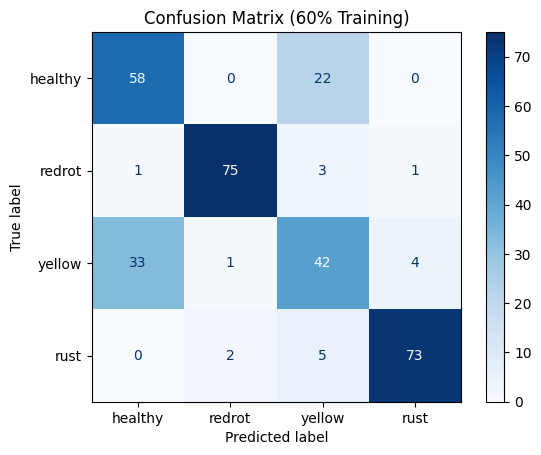



PCA + SVM (70% Training)
OCA components used: 343 (Total Variance: 98.01%)
Accuracy: 76.76%
Precision: 77.03%
Recall: 76.71%
F1-score: 76.83%


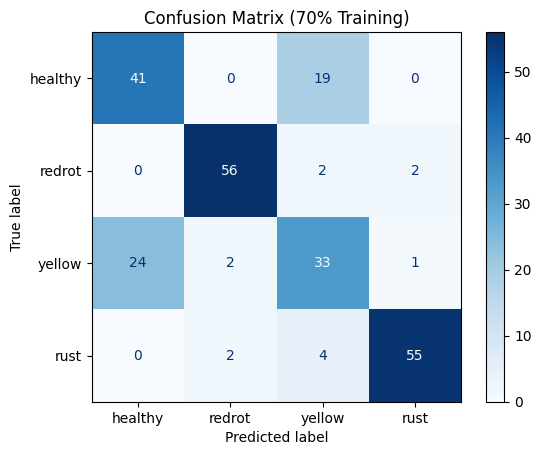



PCA + SVM (80% Training)
OCA components used: 386 (Total Variance: 98.01%)
Accuracy: 80.00%
Precision: 80.39%
Recall: 80.00%
F1-score: 79.81%


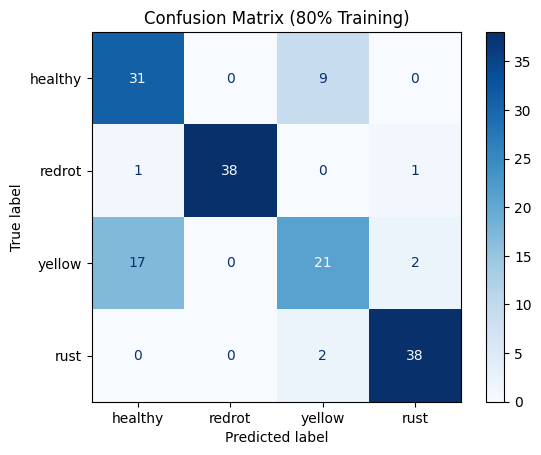


Prediction


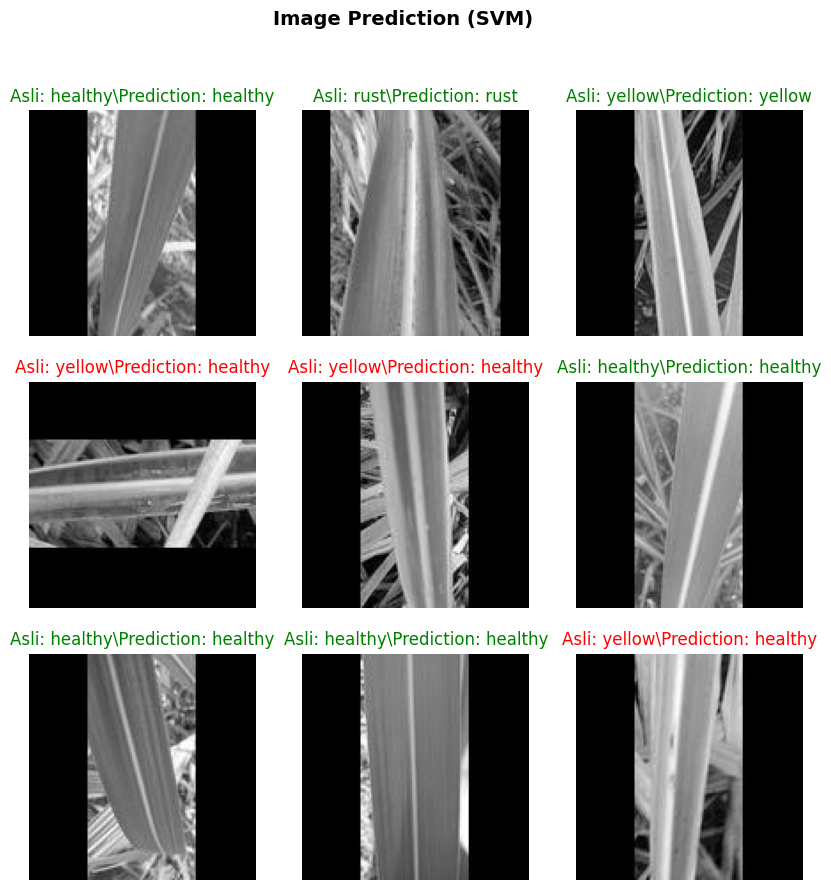

In [ ]:
# DIsplay the result
pca_svm(X, Y, 0.6, file_list)
print()
pca_svm(X, Y, 0.7, file_list)
print()

idx_test, y_test, y_pred = pca_svm(X, Y, 0.8, file_list)
show_prediction_images(idx_test, y_test, y_pred, file_list)


# Conclusion
The combination of grayscale, PCA, and SVM methods achieved good classification performance on sugarcane leaf images. Across several training scenarios, the 80% training data configuration yielded the best performance, with 80% accuracy, surpassing the 60% and 70% scenarios. These results indicate that increasing the training data proportion helps the model more effectively capture sugarcane leaf feature patterns.